<a href="https://colab.research.google.com/github/GabrielaRomoM/EjerciciosSYS-Python/blob/main/LAPLACE/Ejercicios_9NOV23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cuaderno 5**

Ejercicio

- Qué relación tiene λ con la salida obtenida al resolver la EDO?

λ en el caso de la salida obtenida al resolver una EDO influye en la estabilidad y el comportamiento de este sistema debido a  la parte real y/o imaginaria y la amplitud del eigenvalor que lo compone. En el caso de la salida obtenida en la EDO mostrada en el cuaderno puede decirse que λ esta relacionado con la parte imaginaria de s que define la función en el denominador, ya que  λ se toma como un escalar complejo y s puede expresarse como s= σ+λi.

- Puede generalizar sus resultados a una EDO de orden arbitrario?

Ya que la generalización de resultados implica extender la EDO de segundo orden y(t) a una EDO de orden superior, si es posible ya que se trata de una EDO lineal con coeficientes constantes y dentro del dominio de Laplace.

**Cuaderno 8**

- Encuentre la función de transferencia (demostración matemática) para un circuito RLC paralelo (entrada: fuente de corriente AC, salida: corriente en inductor), con condiciones iniciales cero. Luego, utilizando la API de control de sympy, simular y graficar: i) diagrama de polos y ceros, ii) diagrama de bode iii) respuesta impulso, iv) respuesta escalón, v) respuesta rampa.

Demostración matemática RLC paralelo con condiciones iniciales cero.

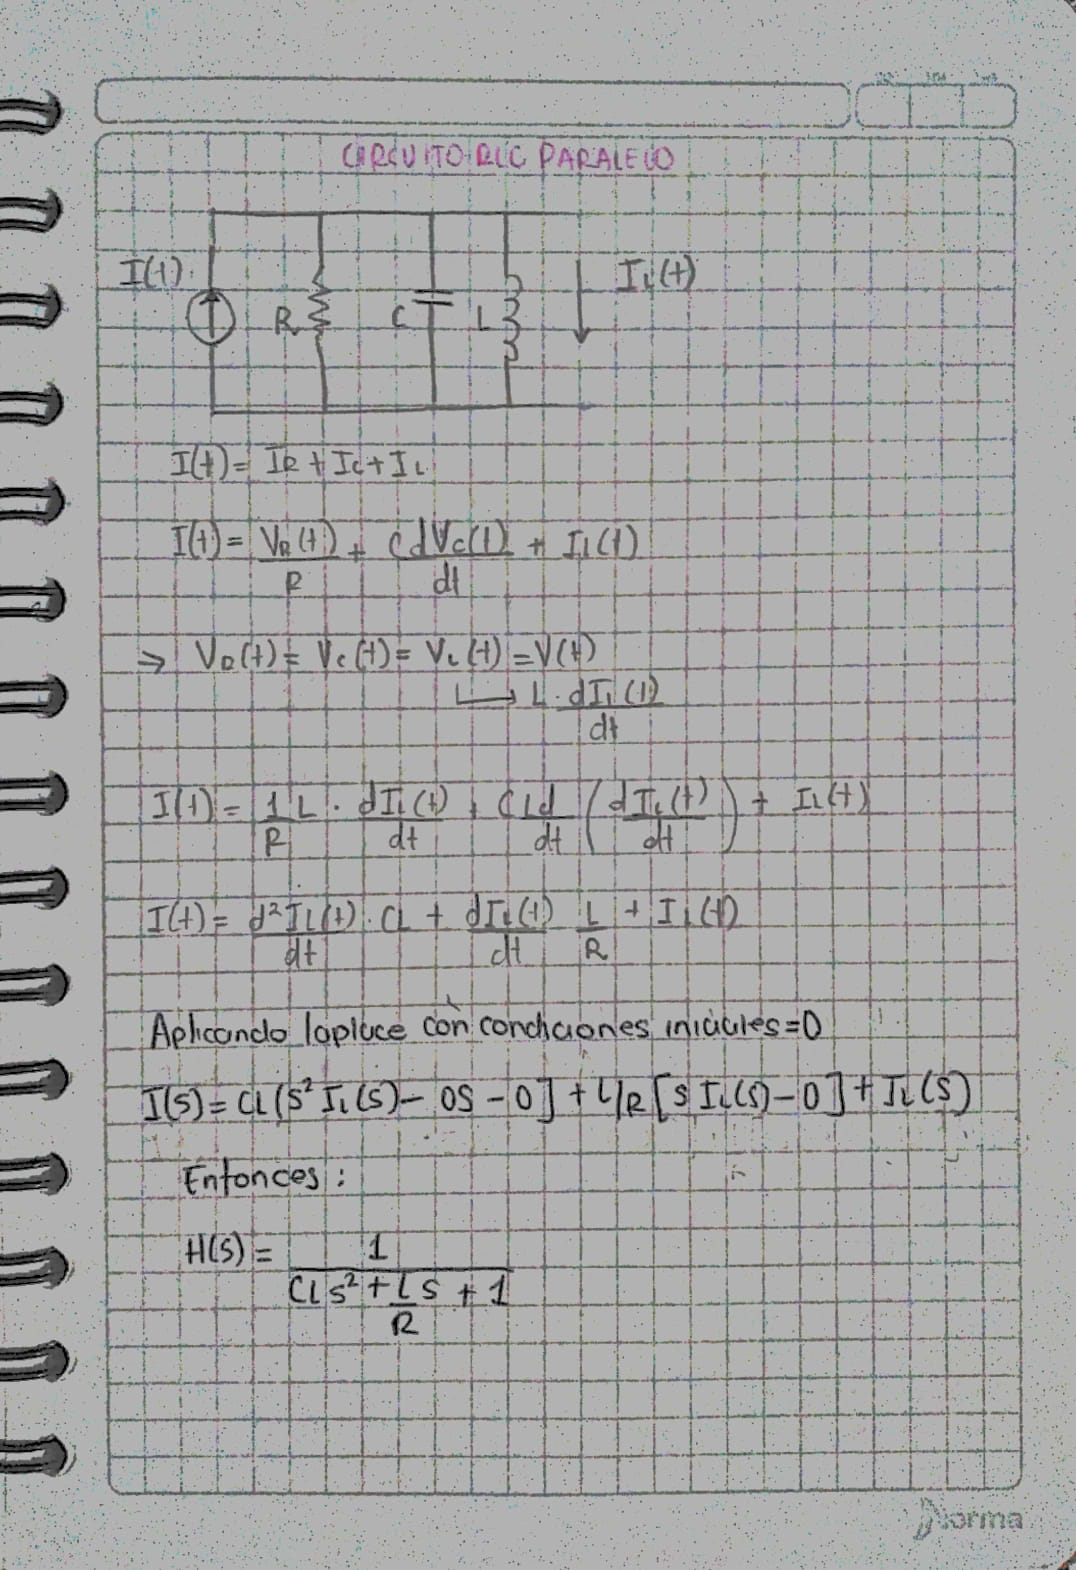

Simulación con API de control sympy

In [1]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 7.3 MB/s eta 0:00:00


In [2]:
import sympy as sym
import matplotlib.pyplot as plt
import sympy.physics.control as control

sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
#Entrada de interés en Laplace
X = 1 # Ajustar según tipo de entrada
H = control.TransferFunction(1,L*C*s**2 + L/R*s + 1,s) #Funcion de transferencia con la API de control

Y = H.num*X/H.den#función de transferencia del circuito multiplicada por X(s)
Y

       1        
────────────────
     2   L⋅s    
C⋅L⋅s  + ─── + 1
          R     

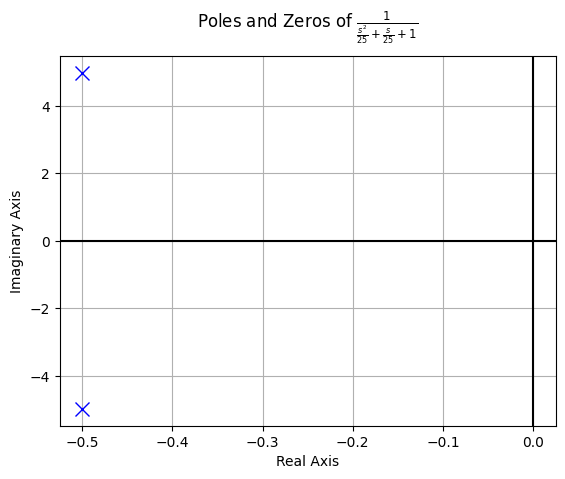

In [3]:
#Polos y Ceros
RLC = {R: 100, L: 4, C: sym.Rational('.01')} #valores para RLC
HS=control.TransferFunction(H.num,H.den.subs(RLC),s)
control.pole_zero_plot(HS)

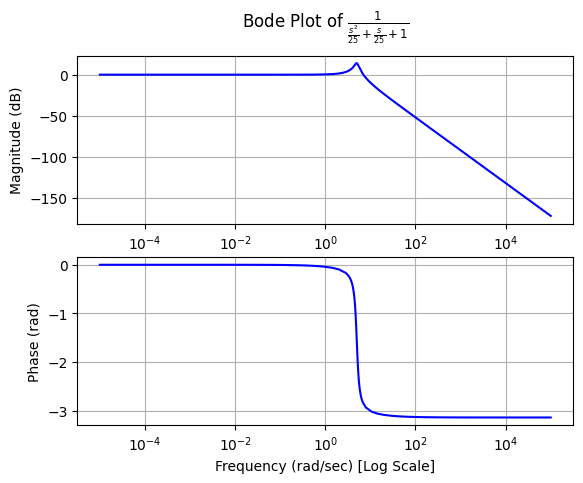

In [4]:
#Diagrama de Bode
control.bode_plot(HS)

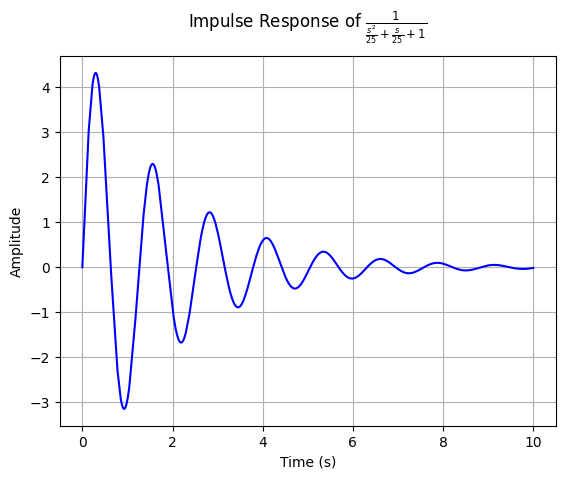

In [5]:
#Respuesta al Impulso
control.impulse_response_plot(HS)

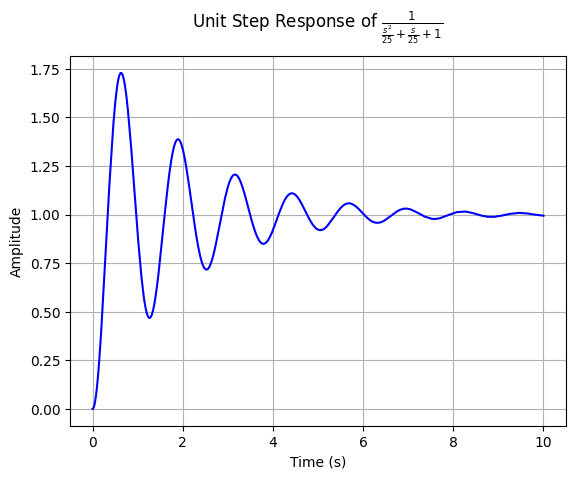

In [6]:
#Respuesta al Escalón
control.step_response_plot(HS)

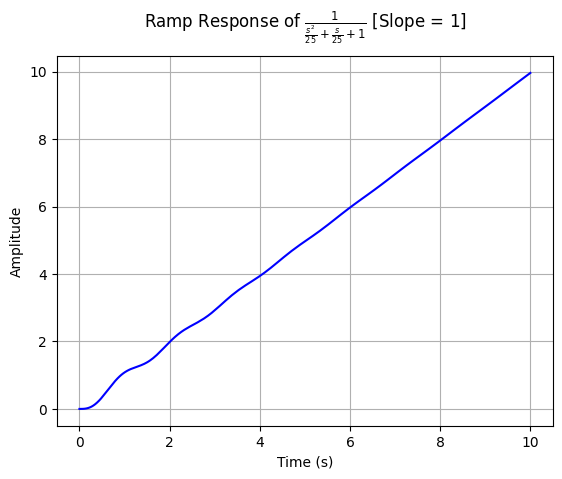

In [7]:
#Respuesta a la Rampa
control.ramp_response_plot(HS)